In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
df=pd.read_csv("总表.csv")

In [ ]:
df = df.drop('year', 1)
df = df.drop('month', 1)

In [ ]:
perdict_name = '上证收盘'
# df = df.drop('上证收盘', 1)
df = df.drop('沪深300收盘', 1)

In [ ]:
df.head(2)

,X1居民消费价格指数,X2企业景气指数,X3工业增加值,X4货币供应量,X5银行间拆借利率,X6人民币对美元的汇率（收盘）,X7进出口总额,X8国家财政支出,X9股市成交量（上海）,X10城镇固定资产投资额,上证收盘
0,102.0,125.6,9400,992129.25,183.0775,6.2188,345584884.0,13655.86,2682.0,57953.0,2177.76
1,103.2,125.6,9900,998600.83,182.0775,6.2214,263509010.0,8770.28,1831.0,54119.0,2122.38


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
summary=df.describe()

In [ ]:
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
X1居民消费价格指数,60.0,1.019249e+02,5.625630e-01,1.008000e+02,1.015000e+02,1.019000e+02,1.023000e+02,1.032000e+02
X2企业景气指数,60.0,1.189350e+02,5.676112e+00,1.071000e+02,1.150000e+02,1.210500e+02,1.234000e+02,1.256000e+02
X3工业增加值,60.0,7.381667e+03,1.494112e+03,5.600000e+03,6.100000e+03,6.700000e+03,8.825000e+03,1.040000e+04
X4货币供应量,60.0,1.333738e+06,2.106368e+05,9.921292e+05,1.166781e+06,1.343293e+06,1.517142e+06,1.676769e+06
X5银行间拆借利率,60.0,1.470348e+02,3.036736e+01,5.741150e+01,1.388275e+02,1.535775e+02,1.683275e+02,1.830775e+02
X6人民币对美元的汇率（收盘）,60.0,6.399192e+00,2.717037e-01,6.054000e+00,6.171750e+00,6.264450e+00,6.635500e+00,6.945000e+00
X7进出口总额,60.0,3.379730e+08,3.837064e+07,2.196970e+08,3.205676e+08,3.408592e+08,3.602722e+08,4.089081e+08
X8国家财政支出,60.0,1.256383e+04,2.644888e+03,8.588170e+03,1.054400e+04,1.220923e+04,1.451886e+04,2.020810e+04
X9股市成交量（上海）,60.0,4.325288e+03,2.909077e+03,1.501000e+03,2.467000e+03,3.390825e+03,5.079557e+03,1.320300e+04
X10城镇固定资产投资额,60.0,5.006324e+04,8.998973e+03,3.241636e+04,4.443869e+04,5.052943e+04,5.570076e+04,7.688700e+04


In [ ]:
df.describe().round()

,X1居民消费价格指数,X2企业景气指数,X3工业增加值,X4货币供应量,X5银行间拆借利率,X6人民币对美元的汇率（收盘）,X7进出口总额,X8国家财政支出,X9股市成交量（上海）,X10城镇固定资产投资额,上证收盘
count,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
mean,102.0,119.0,7382.0,1333738.0,147.0,6.0,337973045.0,12564.0,4325.0,50063.0,2520.0
std,1.0,6.0,1494.0,210637.0,30.0,0.0,38370641.0,2645.0,2909.0,8999.0,546.0
min,101.0,107.0,5600.0,992129.0,57.0,6.0,219697006.0,8588.0,1501.0,32416.0,1747.0
25%,102.0,115.0,6100.0,1166781.0,139.0,6.0,320567574.0,10544.0,2467.0,44439.0,1942.0
50%,102.0,121.0,6700.0,1343293.0,154.0,6.0,340859246.0,12209.0,3391.0,50529.0,2644.0
75%,102.0,123.0,8825.0,1517142.0,168.0,7.0,360272168.0,14519.0,5080.0,55701.0,2930.0
max,103.0,126.0,10400.0,1676769.0,183.0,7.0,408908054.0,20208.0,13203.0,76887.0,3684.0


In [ ]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scale_df=mc.fit_transform(df)
scale_df

array([[0.5       , 1.        , 0.79166667, 0.        , 1.        ,
        0.18496072, 0.66533048, 0.43612053, 0.10092292, 0.57423597,
        0.22228304],
       [1.        , 1.        , 0.89583333, 0.00945254, 0.9920424 ,
        0.18787879, 0.23155098, 0.01567221, 0.02820031, 0.48802179,
        0.19368565],
       [0.54166667, 1.        , 0.6875    , 0.06387177, 0.9840848 ,
        0.17598204, 0.76901477, 0.08774407, 0.07118441, 0.56456667,
        0.11379057],
       [0.66666667, 0.72972973, 0.77083333, 0.05904226, 0.97612719,
        0.12457912, 0.7201718 , 0.24463486, 0.        , 0.63301632,
        0.10099972],
       [0.540875  , 0.72972973, 0.75      , 0.07308945, 0.96816959,
        0.09068462, 0.66280626, 0.35807703, 0.0687062 , 0.49984981,
        0.14995301],
       [0.79166667, 0.72972973, 0.6875    , 0.09095949, 0.96021199,
        0.09382716, 0.53807736, 0.32606048, 0.0046146 , 0.47036969,
        0.01501131],
       [0.79166667, 0.77837838, 0.85416667, 0.08775875, 0.

In [ ]:
df_sc=pd.DataFrame(scale_df)

In [ ]:
df_sc.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.5,1.0,0.791667,0.000000,1.000000,0.184961,0.665330,0.436121,0.100923,0.574236,0.222283
1,1.0,1.0,0.895833,0.009453,0.992042,0.187879,0.231551,0.015672,0.028200,0.488022,0.193686


In [ ]:
df_sc.describe().round()

,0,1,2,3,4,5,6,7,8,9,10
count,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
mean,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


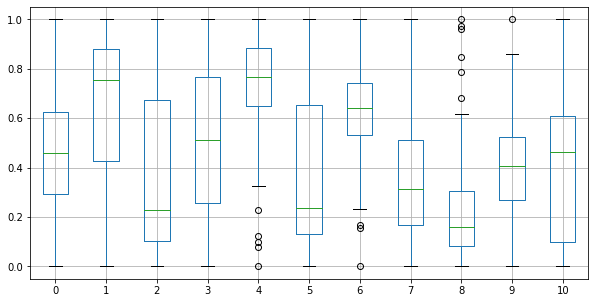

In [ ]:
df_sc.boxplot(figsize=(10,5))
plt.show()

In [ ]:
df_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.500000,1.00000,0.791667,0.000000,1.000000,0.184961,0.665330,0.436121,0.100923,0.574236,0.222283
1,1.000000,1.00000,0.895833,0.009453,0.992042,0.187879,0.231551,0.015672,0.028200,0.488022,0.193686
2,0.541667,1.00000,0.687500,0.063872,0.984085,0.175982,0.769015,0.087744,0.071184,0.564567,0.113791
3,0.666667,0.72973,0.770833,0.059042,0.976127,0.124579,0.720172,0.244635,0.000000,0.633016,0.101000
4,0.540875,0.72973,0.750000,0.073089,0.968170,0.090685,0.662806,0.358077,0.068706,0.499850,0.149953


In [ ]:
x=df_sc.drop(10,axis=1)
x.shape

(60, 10)

In [ ]:
y=df_sc[10]
y.shape

(60,)

In [ ]:
# train_test_split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=12,shuffle=False)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((48, 10), (12, 10), (48,), (12,))

In [ ]:
#import keras
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [ ]:
#first input and first hidden layer
model=Sequential()
model.add(Dense(20,input_dim=10,activation='relu'))
#second hidden layer
model.add(Dense(20,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [ ]:
#compile ANN
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
#fit and display the summary
model.fit(X_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.4060 - accuracy: 0.0243
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.3742 - accuracy: 0.0139
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.0243
Epoch 4/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.2694 - accuracy: 0.0243
Epoch 5/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.2270 - accuracy: 0.0243
Epoch 6/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1805 - accuracy: 0.0243
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.1660 - accuracy: 0.0243
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1481 - accuracy: 0.0139
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.1274 - accuracy: 0.0243
Epoch 10/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.0139
Epoch 11/1000
2/2 [

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


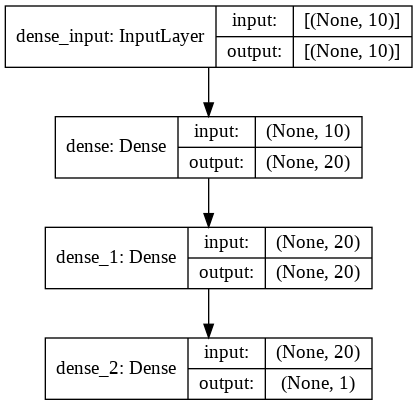

In [ ]:
# model = load_model(perdict_name)
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# model.save(perdict_name)

In [ ]:
#Testing the test dataset
y_pred=model.predict(X_test)
y_pred

array([[0.25303605],
       [0.6849188 ],
       [0.5661533 ],
       [0.6102001 ],
       [0.35382262],
       [0.20473889],
       [0.5483915 ],
       [0.46919796],
       [0.34043056],
       [0.28299385],
       [0.4039483 ],
       [0.28996578]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

Text(0.5, 1.0, 'Neural Network Model')

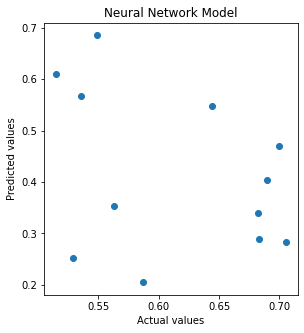

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Neural Network Model")

In [ ]:
ori_X_test = mc.inverse_transform(X_test.join(y_test))
ori_X_pred = mc.inverse_transform(pd.concat([X_test,pd.DataFrame(y_pred,X_test.index,None)],axis=1))
print('origin test data is \n',pd.DataFrame(ori_X_test,X_test.index,None))
print('predicted data is \n',pd.DataFrame(ori_X_pred,X_test.index,None))
pd.DataFrame(ori_X_pred,X_test.index,None).to_csv(perdict_name+".csv")

origin test data is 
        0      1       2           3   ...       7        8        9        10
48  102.5  123.4  6500.0  1575945.59  ...  20208.1  2781.96  56142.0  2771.26
49  100.8  123.4  7000.0  1582913.07  ...  11245.4  3422.65  54243.0  2810.22
50  100.9  123.4  7600.0  1599609.57  ...  12912.5  4140.38  52399.0  2785.25
51  101.2  123.1  6500.0  1596331.87  ...  16784.2  3804.05  50550.0  2743.75
52  101.5  123.1  6500.0  1601360.42  ...  16073.4  3245.10  59391.0  2838.24
53  101.5  123.1  7600.0  1631282.53  ...  17082.4  3212.64  76887.0  2884.58
54  101.4  123.5  6400.0  1628996.63  ...  16456.5  4200.14  56804.0  2994.17
55  101.8  123.5  6000.0  1645156.60  ...  10652.5  5069.41  56741.0  3102.14
56  101.6  123.5  6600.0  1655662.07  ...  12714.0  4248.30  64328.0  3067.78
57  101.9  123.4  6200.0  1653434.16  ...  16234.0  2716.78  59340.0  3113.69
58  101.7  123.4  6100.0  1670013.40  ...  11385.0  3996.77  57239.0  3083.65
59  101.8  123.4  6200.0  1676768.54  ... 

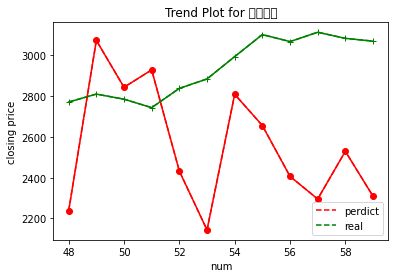

In [ ]:
x1=x2=X_test.index
y1=ori_X_pred[:,10]
y2=ori_X_test[:,10]
plt.plot(x1,y1,'ro-',x2,y2,'g+-')
plt.title('Trend Plot for '+perdict_name)
l1=plt.plot(x1,y1,'r--',label='perdict')
l2=plt.plot(x2,y2,'g--',label='real')
plt.xlabel('num')
plt.ylabel('closing price')
plt.legend()
plt.show()

In [ ]:
print('MAE:',mean_absolute_error(y_test,y_pred))
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)
print('RMSE:',np.sqrt(mse))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))
score=model.evaluate(X_test,y_test,verbose=0)
score[0]
print('score:',score[0])

MAE: 0.24156380034820413
MSE: 0.07404743383443672
RMSE: 0.27211658132946753
MAPE: 0.3835159825765612
R2: -13.21341315299023
score: 0.07404743880033493
